In [57]:
import pyodbc
import mysql.connector
import matplotlib.pyplot as plt  # Corrected typo from 'ply' to 'plt'
import pandas as pd


# 1. This block connects me to my database in Docker

server_address = 'localhost,1433'
database_name = 'SNB_Database'
username = 'sa'
password = '4503Snb3#'

# Connection string
connection_string = f"DRIVER={{/opt/homebrew/Cellar/msodbcsql17/17.10.5.1/lib/libmsodbcsql.17.dylib}};SERVER={server_address};DATABASE={database_name};UID={username};PWD={password}"

try:
    # Establish the connection
    conn = pyodbc.connect(connection_string)
    print("Successfully connected to the database!")
    
except Exception as e:
    print(f"An error occurred: {e}")


Successfully connected to the database!


In [59]:
# 2. This is my first query for Project 8.1

# Check if connection is open
if conn.closed:
    print("Connection closed. Reconnecting...")
    conn = pyodbc.connect(connection_string)

# Define the SQL query
sql_query = """
WITH Master16_NCD AS (
    SELECT
        SUM([Jan. 2016]) AS Jan_2016,
        SUM([Feb. 2016]) AS Feb_2016,
        SUM([Mar. 2016]) AS Mar_2016,
        SUM([Apr. 2016]) AS Apr_2016,
        SUM([May. 2016]) AS May_2016,
        SUM([Jun. 2016]) AS Jun_2016,
        SUM([Jul. 2016]) AS Jul_2016,
        SUM([Aug. 2016]) AS Aug_2016,
        SUM([Sep. 2016]) AS Sep_2016,
        SUM([Oct. 2016]) AS Oct_2016,
        SUM([Nov. 2016]) AS Nov_2016,
        SUM([Dec. 2016]) AS Dec_2016
    FROM Master16
    WHERE [Kind of Business] = 'New car dealers'
),
Master17_NCD AS (
    SELECT
        SUM([Jan. 2017]) AS Jan_2017,
        SUM([Feb. 2017]) AS Feb_2017,
        SUM([Mar. 2017]) AS Mar_2017,
        SUM([Apr. 2017]) AS Apr_2017,
        SUM([May. 2017]) AS May_2017,
        SUM([Jun. 2017]) AS Jun_2017,
        SUM([Jul. 2017]) AS Jul_2017,
        SUM([Aug. 2017]) AS Aug_2017,
        SUM([Sep. 2017]) AS Sep_2017,
        SUM([Oct. 2017]) AS Oct_2017,
        SUM([Nov. 2017]) AS Nov_2017,
        SUM([Dec. 2017]) AS Dec_2017
    FROM Master17_Copy
    WHERE [Kind of Business] = 'New car dealers'
)
SELECT
     'January' AS Month,
    M16.Jan_2016 AS Sales_2016,
    M17.Jan_2017 AS Sales_2017,
    M17.Jan_2017 - M16.Jan_2016 AS Sales_Difference
FROM Master16_NCD M16, Master17_NCD M17
UNION ALL
SELECT
    'February',
    M16.Feb_2016,
    M17.Feb_2017,
    M17.Feb_2017 - M16.Feb_2016
FROM Master16_NCD M16, Master17_NCD M17
UNION ALL
SELECT
    'March',
    M16.Mar_2016,
    M17.Mar_2017,
    M17.Mar_2017 - M16.Mar_2016
FROM Master16_NCD M16, Master17_NCD M17
UNION ALL
SELECT
    'April',
    M16.Apr_2016,
    M17.Apr_2017,
    M17.Apr_2017 - M16.Apr_2016
FROM Master16_NCD M16, Master17_NCD M17
UNION ALL
SELECT
    'May',
    M16.May_2016,
    M17.May_2017,
    M17.May_2017 - M16.May_2016
FROM Master16_NCD M16, Master17_NCD M17
UNION ALL
SELECT
    'June',
    M16.Jun_2016,
    M17.Jun_2017,
    M17.Jun_2017 - M16.Jun_2016
FROM Master16_NCD M16, Master17_NCD M17
UNION ALL
SELECT
    'July',
    M16.Jul_2016,
    M17.Jul_2017,
    M17.Jul_2017 - M16.Jul_2016
FROM Master16_NCD M16, Master17_NCD M17
UNION ALL
SELECT
    'August',
    M16.Aug_2016,
    M17.Aug_2017,
    M17.Aug_2017 - M16.Aug_2016
FROM Master16_NCD M16, Master17_NCD M17
UNION ALL
SELECT
    'September',
    M16.Sep_2016,
    M17.Sep_2017,
    M17.Sep_2017 - M16.Sep_2016
FROM Master16_NCD M16, Master17_NCD M17
UNION ALL
SELECT
    'October',
    M16.Oct_2016,
    M17.Oct_2017,
    M17.Oct_2017 - M16.Oct_2016
FROM Master16_NCD M16, Master17_NCD M17
UNION ALL
SELECT
    'November',
    M16.Nov_2016,
    M17.Nov_2017,
    M17.Nov_2017 - M16.Nov_2016
FROM Master16_NCD M16, Master17_NCD M17
UNION ALL
SELECT
    'December',
    M16.Dec_2016,
    M17.Dec_2017,
    M17.Dec_2017 - M16.Dec_2016
FROM Master16_NCD M16, Master17_NCD M17;

"""

# Execute the SQL query and store the result in a Pandas DataFrame
try:
    df = pd.read_sql(sql_query, conn)
    print("Query executed successfully.")
    print(df)
except Exception as e:
    print(f"An error occurred while executing the query: {e}")


Query executed successfully.
        Month  Sales_2016  Sales_2017  Sales_Difference
0     January     62569.0     65936.0            3367.0
1    February     67800.0     67908.0             108.0
2       March     76194.0     79946.0            3752.0
3       April     73798.0     72863.0            -935.0
4         May     75336.0     79723.0            4387.0
5        June     73973.0     76450.0            2477.0
6        July     76669.0     77677.0            1008.0
7      August     80417.0     80177.0            -240.0
8   September     73954.0     77024.0            3070.0
9     October     71517.0     75083.0            3566.0
10   November     70724.0     73878.0            3154.0
11   December     80614.0     79822.0            -792.0


/var/folders/4k/6501dhvd3t14cqkgdj3m0jl40000gn/T/ipykernel_67426/4066605383.py:132: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


In [30]:
# 2. This is my second query for Project 8.1

try:
    if conn.closed:
        print("Connection closed. Reconnecting...")
        conn = pyodbc.connect(connection_string)
except NameError:
    print("Connection was never established. Connecting now...")
    conn = pyodbc.connect(connection_string)

# Define the SQL query
sql_query = """
SELECT [Kind of Business],[Jun. 2018]
FROM Master18;
"""

# Execute the SQL query and store the result in a Pandas DataFrame
try:
    df = pd.read_sql(sql_query, conn)
    print("Query executed successfully.")
    print(df)
except Exception as e:
    print(f"An error occurred while executing the query: {e}")


Query executed successfully.
                                     Kind of Business  Jun. 2018
0                                                GAFO   106035.0
1                     Motor vehicle and parts dealers   104879.0
2          Automobile and other motor vehicle dealers    96675.0
3                                  Automobile dealers    88505.0
4                                     New car dealers    78485.0
5                                    Used car dealers    10020.0
6             Automotive parts, acc., and tire stores     8204.0
7   Furniture, home furn, electronics, and applian...    17425.0
8               Furniture and home furnishings stores     9921.0
9                                    Furniture stores     5409.0
10                            Home furnishings stores     4512.0
11                              Floor covering stores        0.0
12                  All other home furnishings stores     2209.0
13                   Electronics and appliance stores     750

/var/folders/4k/6501dhvd3t14cqkgdj3m0jl40000gn/T/ipykernel_67426/1136011157.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


In [63]:
# 3. Analyzing Trends in Data

import pyodbc
import pandas as pd

# Initialize the connection (assuming connection_string is already defined)
try:
    if conn.closed:
        print("Connection closed. Reconnecting...")
        conn = pyodbc.connect(connection_string)
except NameError:
    print("Connection was never established. Connecting now...")
    conn = pyodbc.connect(connection_string)

# Function to fetch data
def fetch_New_car_dealers(Master_file, year):
    # SQL query to fetch monthly sales data for 'New car dealers'
    sql_query = f"""
    SELECT [Jan. {year}], [Feb. {year}], [Mar. {year}], [Apr. {year}], [May. {year}], [Jun. {year}],
           [Jul. {year}], [Aug. {year}], [Sep. {year}], [Oct. {year}], [Nov. {year}], [Dec. {year}]
    FROM {Master_file}
    WHERE [Kind of Business] = 'New car dealers';
    """
    df = pd.read_sql(sql_query, conn)
    
    # Calculate the sum of all months to get the yearly sales
    df['Yearly Sales'] = df.sum(axis=1)
    df['Year'] = year
    
    return df

# Define the Master_file and year

Master_file = "Master16"  # Replace with the actual table name
year = 2016  # Replace with the year

# Establish the connection (assuming connection_string is already defined)
conn = pyodbc.connect(connection_string)

# Fetch data for a specific year
data_for_year = fetch_New_car_dealers(Master_file, year)

# Define the Sales_Category
Sales_Category = "New car dealers"

# Show the data in a table format
print(f"This is the annual sales data for {Sales_Category} for year {year}:")
print(data_for_year[['Year', 'Yearly Sales']].to_string(index=False))


This is the annual sales data for New car dealers for year 2016:
 Year  Yearly Sales
 2016      883565.0


/var/folders/4k/6501dhvd3t14cqkgdj3m0jl40000gn/T/ipykernel_67426/1868680066.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


This is the annual sales data for New car dealers for multiple years:
 Year  Yearly Sales
 2016      883565.0
 2017      906487.0
 2018      918128.0
 2019      944324.0
 2020      931212.0


/var/folders/4k/6501dhvd3t14cqkgdj3m0jl40000gn/T/ipykernel_67426/894566978.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)
/var/folders/4k/6501dhvd3t14cqkgdj3m0jl40000gn/T/ipykernel_67426/894566978.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)
/var/folders/4k/6501dhvd3t14cqkgdj3m0jl40000gn/T/ipykernel_67426/894566978.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)
/var/folders/4k/6501dhvd3t14cqkgdj3m0jl4000

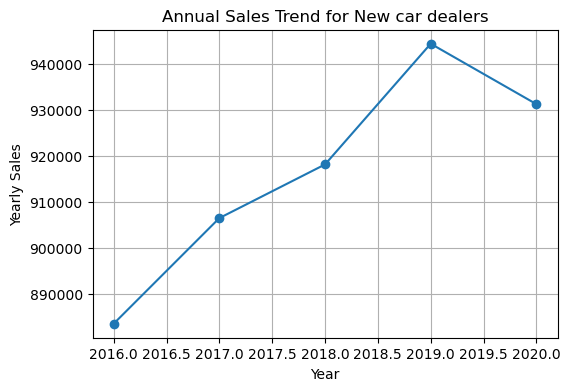

In [56]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt

# 4. Expanded trends on New car dealers to include multiple years

try:
    if conn.closed:
        print("Connection closed. Reconnecting...")
        conn = pyodbc.connect(connection_string)
except NameError:
    print("Connection was never established. Connecting now...")
    conn = pyodbc.connect(connection_string)

# Function to fetch data
def fetch_New_car_dealers(Master_file, year):
    sql_query = f"""
    SELECT [Jan. {year}], [Feb. {year}], [Mar. {year}], [Apr. {year}], [May. {year}], [Jun. {year}],
           [Jul. {year}], [Aug. {year}], [Sep. {year}], [Oct. {year}], [Nov. {year}], [Dec. {year}]
    FROM {Master_file}
    WHERE [Kind of Business] = 'New car dealers';
    """
    df = pd.read_sql(sql_query, conn)
    df['Yearly Sales'] = df.sum(axis=1)
    df['Year'] = year
    return df

# Define the Master_files and years you're interested in
Master_files = ["Master16", "Master17_Copy", "Master18", "Master19", "Master20"]
years = [2016, 2017, 2018, 2019, 2020]

# Establish the connection (assuming connection_string is already defined)
conn = pyodbc.connect(connection_string)

# Initialize an empty DataFrame to store all years' data
all_years_data = pd.DataFrame()

# Fetch and concatenate data for multiple years
for Master_file, year in zip(Master_files, years):
    data_for_year = fetch_New_car_dealers(Master_file, year)
    all_years_data = pd.concat([all_years_data, data_for_year], ignore_index=True)

# Define the Sales_Category
Sales_Category = "New car dealers"

# Show the data in a table format
print(f"This is the annual sales data for {Sales_Category} for multiple years:")
print(all_years_data[['Year', 'Yearly Sales']].to_string(index=False))

# Plotting the annual trends
plt.figure(figsize=(6, 4))
plt.plot(all_years_data['Year'], all_years_data['Yearly Sales'], marker='o')
plt.title(f"Annual Sales Trend for {Sales_Category}")
plt.xlabel("Year")
plt.ylabel("Yearly Sales")
plt.grid(True)
plt.show()


This is the annual sales data for multiple years and categories:
 Year          Category  Yearly Sales
 2016   New car dealers      883565.0
 2016 Gasoline stations      436143.0
 2016      Fuel dealers       27510.0
 2017   New car dealers      906487.0
 2017 Gasoline stations      476152.0
 2017      Fuel dealers       31433.0
 2018   New car dealers      918128.0
 2018 Gasoline stations      521453.0
 2018      Fuel dealers       36530.0
 2019   New car dealers      944324.0
 2019 Gasoline stations      512377.0
 2019      Fuel dealers       34970.0
 2020   New car dealers      931212.0
 2020 Gasoline stations      430116.0
 2020      Fuel dealers       29874.0


/var/folders/4k/6501dhvd3t14cqkgdj3m0jl40000gn/T/ipykernel_67426/3551394599.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)
/var/folders/4k/6501dhvd3t14cqkgdj3m0jl40000gn/T/ipykernel_67426/3551394599.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)
/var/folders/4k/6501dhvd3t14cqkgdj3m0jl40000gn/T/ipykernel_67426/3551394599.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)
/var/folders/4k/6501dhvd3t14cqkgdj3m0jl4

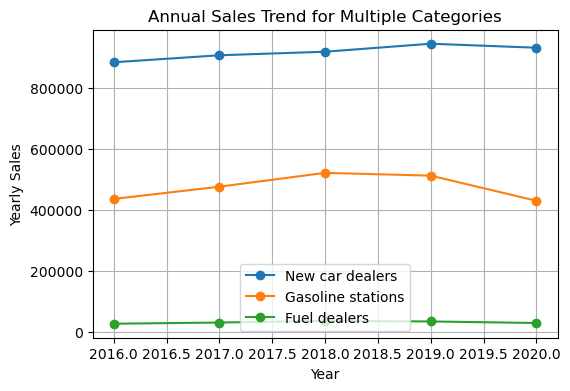

In [64]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt


# 5. More trend expansion to see more sales categories over the 5-year period

try:
    if conn.closed:
        print("Connection closed. Reconnecting...")
        conn = pyodbc.connect(connection_string)
except NameError:
    print("Connection was never established. Connecting now...")
    conn = pyodbc.connect(connection_string)

try:
    if conn.closed:
        print("Connection closed. Reconnecting...")
        conn = pyodbc.connect(connection_string)
except NameError:
    print("Connection was never established. Connecting now...")
    conn = pyodbc.connect(connection_string)

# Function to fetch data
def fetch_sales_data(Master_file, year, Sales_Category):
    sql_query = f"""
    SELECT [Jan. {year}], [Feb. {year}], [Mar. {year}], [Apr. {year}], [May. {year}], [Jun. {year}],
           [Jul. {year}], [Aug. {year}], [Sep. {year}], [Oct. {year}], [Nov. {year}], [Dec. {year}]
    FROM {Master_file}
    WHERE [Kind of Business] = '{Sales_Category}';
    """
    df = pd.read_sql(sql_query, conn)
    df['Yearly Sales'] = df.sum(axis=1)
    df['Year'] = year
    df['Category'] = Sales_Category
    return df

# Define the Master_files and years you're interested in
Master_files = ["Master16", "Master17_Copy", "Master18", "Master19", "Master20"]
years = [2016, 2017, 2018, 2019, 2020]
sales_categories = ["New car dealers", "Gasoline stations", "Fuel dealers"]

# Initialize an empty DataFrame to store all years' data
all_years_data = pd.DataFrame()

# Fetch and concatenate data for multiple years and categories
for Master_file, year in zip(Master_files, years):
    for Sales_Category in sales_categories:
        data_for_year = fetch_sales_data(Master_file, year, Sales_Category)
        all_years_data = pd.concat([all_years_data, data_for_year], ignore_index=True)

        
# Show the data in a table format
print("This is the annual sales data for multiple years and categories:")
print(all_years_data[['Year', 'Category', 'Yearly Sales']].to_string(index=False))

# Plotting the annual trends
plt.figure(figsize=(6, 4))

for Sales_Category in sales_categories:
    category_data = all_years_data[all_years_data['Category'] == Sales_Category]
    plt.plot(category_data['Year'], category_data['Yearly Sales'], marker='o', label=Sales_Category)

plt.title("Annual Sales Trend for Multiple Categories")
plt.xlabel("Year")
plt.ylabel("Yearly Sales")
plt.legend()
plt.grid(True)
plt.show()


Pearson Correlation Coefficient Matrix:
Category           Fuel dealers  Gasoline stations  New car dealers
Category                                                           
Fuel dealers           1.000000           0.952299         0.616958
Gasoline stations      0.952299           1.000000         0.438814
New car dealers        0.616958           0.438814         1.000000


/var/folders/4k/6501dhvd3t14cqkgdj3m0jl40000gn/T/ipykernel_67426/1398990028.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)
/var/folders/4k/6501dhvd3t14cqkgdj3m0jl40000gn/T/ipykernel_67426/1398990028.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)
/var/folders/4k/6501dhvd3t14cqkgdj3m0jl40000gn/T/ipykernel_67426/1398990028.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)
/var/folders/4k/6501dhvd3t14cqkgdj3m0jl4

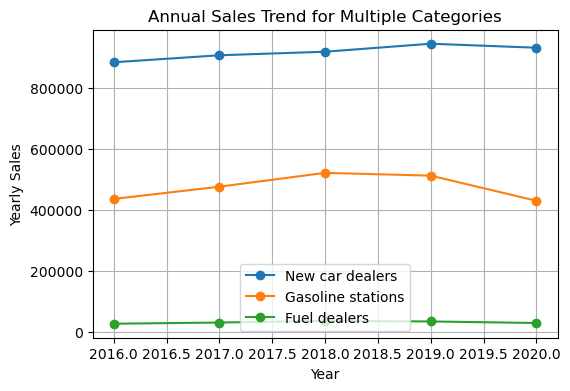

In [62]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt


# 6. Now, let's see if these industries are correlated

try:
    if conn.closed:
        print("Connection closed. Reconnecting...")
        conn = pyodbc.connect(connection_string)
except NameError:
    print("Connection was never established. Connecting now...")
    conn = pyodbc.connect(connection_string)

# Function to fetch data
def fetch_sales_data(Master_file, year, Sales_Category):
    sql_query = f"""
    SELECT [Jan. {year}], [Feb. {year}], [Mar. {year}], [Apr. {year}], [May. {year}], [Jun. {year}],
           [Jul. {year}], [Aug. {year}], [Sep. {year}], [Oct. {year}], [Nov. {year}], [Dec. {year}]
    FROM {Master_file}
    WHERE [Kind of Business] = '{Sales_Category}';
    """
    df = pd.read_sql(sql_query, conn)
    df['Yearly Sales'] = df.sum(axis=1)
    df['Year'] = year
    df['Category'] = Sales_Category
    return df

# Define the Master_files and years you're interested in
Master_files = ["Master16", "Master17_Copy", "Master18", "Master19", "Master20"]
years = [2016, 2017, 2018, 2019, 2020]
sales_categories = ["New car dealers", "Gasoline stations", "Fuel dealers"]

# Initialize an empty DataFrame to store all years' data
all_years_data = pd.DataFrame()

# Fetch and concatenate data for multiple years and categories
for Master_file, year in zip(Master_files, years):
    for Sales_Category in sales_categories:
        data_for_year = fetch_sales_data(Master_file, year, Sales_Category)
        all_years_data = pd.concat([all_years_data, data_for_year], ignore_index=True)

# Aggregate data by 'Year' and 'Category' to sum up 'Yearly Sales'
aggregated_data = all_years_data.groupby(['Year', 'Category'])['Yearly Sales'].sum().reset_index()

# Pivot the DataFrame to prepare for correlation calculation
pivot_data = aggregated_data.pivot(index='Year', columns='Category', values='Yearly Sales')

# Calculate the Pearson Correlation Coefficient
correlation_matrix = pivot_data.corr()
print("Pearson Correlation Coefficient Matrix:")
print(correlation_matrix)

# Plotting the annual trends
plt.figure(figsize=(6, 4))

for Sales_Category in sales_categories:
    category_data = aggregated_data[aggregated_data['Category'] == Sales_Category]
    plt.plot(category_data['Year'], category_data['Yearly Sales'], marker='o', label=Sales_Category)

plt.title("Annual Sales Trend for Multiple Categories")
plt.xlabel("Year")
plt.ylabel("Yearly Sales")
plt.legend()
plt.grid(True)
plt.show()


Pearson Correlation Coefficient Matrix:
Category           Fuel dealers  Gasoline stations  New car dealers
Category                                                           
Fuel dealers           1.000000           0.952299         0.616958
Gasoline stations      0.952299           1.000000         0.438814
New car dealers        0.616958           0.438814         1.000000


/var/folders/4k/6501dhvd3t14cqkgdj3m0jl40000gn/T/ipykernel_67426/1547412536.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)
/var/folders/4k/6501dhvd3t14cqkgdj3m0jl40000gn/T/ipykernel_67426/1547412536.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)
/var/folders/4k/6501dhvd3t14cqkgdj3m0jl40000gn/T/ipykernel_67426/1547412536.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)
/var/folders/4k/6501dhvd3t14cqkgdj3m0jl4

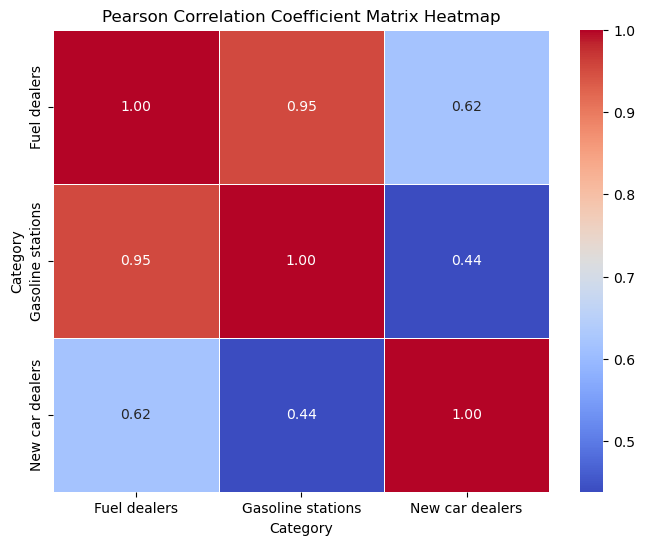

In [65]:
import seaborn as sns
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt

#7 plotting the correlation in seaborn

try:
    if conn.closed:
        print("Connection closed. Reconnecting...")
        conn = pyodbc.connect(connection_string)
except NameError:
    print("Connection was never established. Connecting now...")
    conn = pyodbc.connect(connection_string)

# Function to fetch data
def fetch_sales_data(Master_file, year, Sales_Category):
    sql_query = f"""
    SELECT [Jan. {year}], [Feb. {year}], [Mar. {year}], [Apr. {year}], [May. {year}], [Jun. {year}],
           [Jul. {year}], [Aug. {year}], [Sep. {year}], [Oct. {year}], [Nov. {year}], [Dec. {year}]
    FROM {Master_file}
    WHERE [Kind of Business] = '{Sales_Category}';
    """
    df = pd.read_sql(sql_query, conn)
    df['Yearly Sales'] = df.sum(axis=1)
    df['Year'] = year
    df['Category'] = Sales_Category
    return df

# Define the Master_files and years you're interested in
Master_files = ["Master16", "Master17_Copy", "Master18", "Master19", "Master20"]
years = [2016, 2017, 2018, 2019, 2020]
sales_categories = ["New car dealers", "Gasoline stations", "Fuel dealers"]

# Initialize an empty DataFrame to store all years' data
all_years_data = pd.DataFrame()

# Fetch and concatenate data for multiple years and categories
for Master_file, year in zip(Master_files, years):
    for Sales_Category in sales_categories:
        data_for_year = fetch_sales_data(Master_file, year, Sales_Category)
        all_years_data = pd.concat([all_years_data, data_for_year], ignore_index=True)

# Aggregate data by 'Year' and 'Category' to sum up 'Yearly Sales'
aggregated_data = all_years_data.groupby(['Year', 'Category'])['Yearly Sales'].sum().reset_index()

# Pivot the DataFrame to prepare for correlation calculation
pivot_data = aggregated_data.pivot(index='Year', columns='Category', values='Yearly Sales')

# Calculate the Pearson Correlation Coefficient
correlation_matrix = pivot_data.corr()
print("Pearson Correlation Coefficient Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Pearson Correlation Coefficient Matrix Heatmap")
plt.show()